# Tensorflow

1. Carregar o dataset Boston Housing
O dataset Boston Housing contém dados sobre preços de casas, com 13 variáveis preditoras (como número de quartos, índice de criminalidade, etc.) e o preço médio como variável alvo.

2. Normalizar os dados de entrada:
Os dados de entrada são normalizados usando o StandardScaler do sklearn. A normalização garante que todas as features tenham uma média próxima de 0 e um desvio padrão de 1, o que ajuda a melhorar a convergência durante o treinamento do modelo.

3. Definir a entrada do modelo
A entrada do modelo é criada usando a API funcional do Keras. O formato esperado é (13,), pois existem 13 features em cada amostra do dataset.

4. Criar camadas ocultas
As camadas ocultas são conectadas à camada de entrada. Cada camada usa a ativação relu, que é amplamente utilizada em redes neurais devido à sua simplicidade e eficiência.

5. Definir a camada de saída
A camada de saída é uma camada densa com apenas um neurônio, pois o problema é de regressão (prever o preço de uma casa). Não há função de ativação, pois o modelo deve prever valores contínuos.

6. Criar o modelo
Com a API funcional, o modelo é criado conectando as camadas de entrada e saída.


# Resumo:

- Arquitetura funcional do Keras: Foi usada para criar um modelo flexível e eficiente.
- Normalização: Garante a uniformidade dos dados de entrada.
- Monitoramento da validação: Ajuda a identificar overfitting durante o treinamento.
- Métricas: O erro quadrático médio mede o desempenho na previsão de preços.
Essa abordagem demonstra como usar a API funcional do Keras para construir, treinar e avaliar modelos para problemas de regressão.

Exemplo de uso da arquitetura com "Model" do Keras

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import os
import random
import tensorflow
from tensorflow import keras
from keras.datasets import boston_housing
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Definir a seed para reprodutibilidade
seed = 0
np.random.seed(seed)
tensorflow.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

initializer = tensorflow.keras.initializers.GlorotUniform(seed=seed)

tensorflow.config.experimental.enable_op_determinism()

# Carregando o conjunto de dados Boston Housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Normalizando os dados de entrada usando StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Definindo a entrada do modelo
input_layer = Input(shape=(x_train.shape[1],))

# Definindo as camadas do modelo
hidden_layer1 = Dense(64, activation='relu')(input_layer)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
output_layer = Dense(1)(hidden_layer2)

# Criando o modelo
model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Dividindo os dados em conjunto de treinamento e validação
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Treinando o modelo
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

# Avaliando o modelo com dados de teste
test_loss = model.evaluate(x_test, y_test)
print(f'Erro quadrático médio no conjunto de teste: {test_loss}')

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 607.6686 - val_loss: 428.6452
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 565.6578 - val_loss: 391.7900
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 517.2524 - val_loss: 348.5641
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 458.4668 - val_loss: 296.9242
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 386.7432 - val_loss: 236.8522
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 301.7206 - val_loss: 172.2467
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 212.0709 - val_loss: 113.5368
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 135.2021 - val_loss: 71.5913
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 85.4322 - val_loss: 49.2394
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 62.1120 - val_loss: 38.3942
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 50.9594 - val_loss: 31.3201
Epoch 12/100
11/11 ━━━━━

# Autoencoder



In [ ]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense

# Definir a seed para reprodutibilidade
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

initializer = tf.keras.initializers.GlorotUniform(seed=seed)

# Carrega Dataset

## Carregar e preprocessar o dataset MNIST

O conjunto de dados MNIST é carregado com mnist.load_data(). Ele contém imagens de dígitos com dimensão
28
×
28
28×28.
Os passos de preprocessamento incluem:

Normalização: Dividir os valores de pixel por 255 para escalá-los para o intervalo [0, 1].
Achatamento das imagens: Cada imagem é convertida para um vetor de 784 elementos (
28
×
28
28×28).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


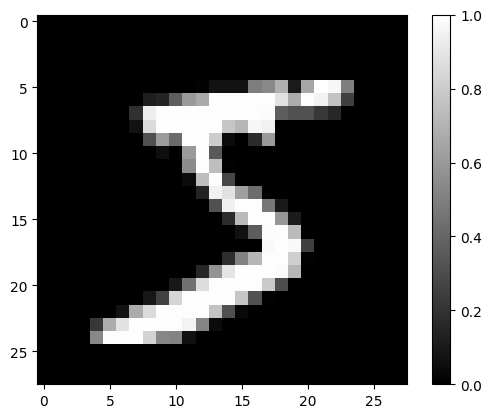

In [ ]:
# Carregando o conjunto de dados MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizando os dados para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Exibir a primeira imagem do conjunto de treinamento
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
# Carregando o conjunto de dados MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizando os dados para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Achatando as imagens para o formato (número de amostras, altura * largura)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
x_train.shape

(60000, 784)

# Treina o Autoencoder

# Definir a arquitetura do Autoencoder

O autoencoder é composto por duas partes principais:

- Encoder: Reduz a dimensionalidade dos dados de entrada, mapeando-os para uma representação mais compacta.

- Decoder: Reconstrói os dados originais a partir dessa representação compacta.
Neste exemplo:

O encoder tem uma camada com 128 neurônios e ativação relu.
O decoder reconstrói a imagem original com 784 neurônios e ativação sigmoid.

In [ ]:
# Definindo a arquitetura do autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compilando o modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Treinando o modelo
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.3141 - val_loss: 0.1347
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.1258 - val_loss: 0.1028
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.1002 - val_loss: 0.0894
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0884 - val_loss: 0.0819
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0816 - val_loss: 0.0773
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0774 - val_loss: 0.0745
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0746 - val_loss: 0.0725
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0727 - val_loss: 0.0711
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0714 - val_loss: 0.0701
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0705 - val_loss: 0.0694
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0697 - val_loss: 0.0688
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━

# Compilar e treinar o modelo
O modelo é compilado com:

- Otimizador: adam (eficiente para treinamento de redes neurais).
- Função de perda: binary_crossentropy, uma escolha comum para autoencoders quando os valores estão normalizados no intervalo [0, 1].

O treinamento é realizado com os dados de entrada servindo como rótulos (pois o objetivo do autoencoder é reconstruir as entradas).

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


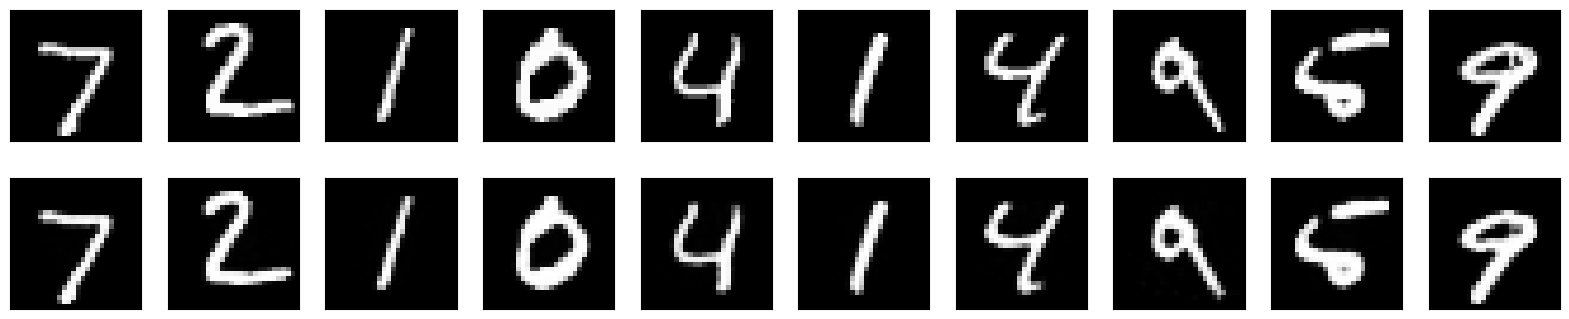

In [ ]:
# Obtendo as imagens reconstruídas pelo autoencoder
decoded_imgs = autoencoder.predict(x_test)

# Visualizando as imagens originais e reconstruídas
n = 10  # Número de imagens para visualizar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Resultados
Após o treinamento:

As imagens reconstruídas devem ser semelhantes às originais, embora possuam alguma perda de detalhes devido à compressão no encoder.
A visualização compara as imagens originais e reconstruídas para avaliar a qualidade da reconstrução.